# Assignment_4 DT

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from graphviz import Source
from sklearn.tree import export_graphviz
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

In [3]:
# Answer:
features_names = ['sepal width (cm)','petal length (cm)']
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=features_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = Source(dot_data)
graph.render("iris_decision_tree")

'iris_decision_tree.pdf'

## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

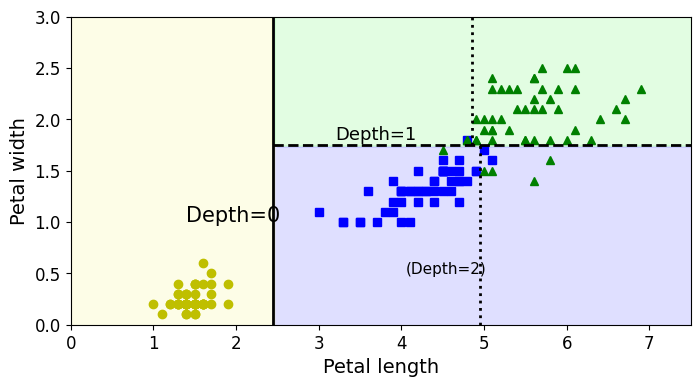

In [5]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

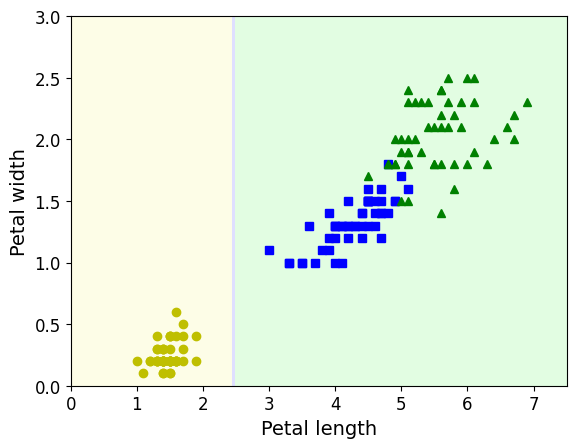

In [7]:
tree_clf_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_clf_depth_1.fit(X, y)
features_names = ['sepal width (cm)','petal length (cm)']
dot_data = export_graphviz(tree_clf_depth_1, out_file=None, 
                           feature_names=features_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = Source(dot_data)
graph.render("iris_decision_tree_depth_1")
plot_decision_boundary(tree_clf_depth_1, X, y)

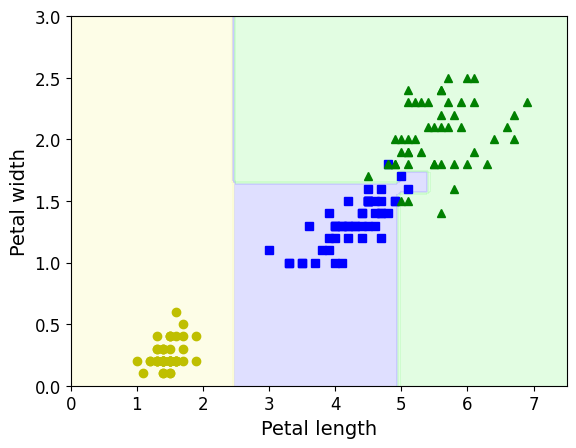

In [8]:
tree_clf_depth_10 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf_depth_10.fit(X, y)
features_names = ['sepal width (cm)','petal length (cm)']
dot_data = export_graphviz(tree_clf_depth_10, out_file=None, 
                           feature_names=features_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = Source(dot_data)
graph.render("iris_decision_tree_depth_10")
plot_decision_boundary(tree_clf_depth_10, X, y)

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1. The entropy of blocks of the tree with depth 1 (1.58, 0, 1)
   The entropy of blocks of the tree with depth 2 (1.585, 0, 1.0, 0.445, 0.151)
   The entropy of blocks of the tree with depth 10(1.585, 0, 1, 0.445,0.151, 0.146, 0.918, 0.918, 0.0, 0.0, 0.0, 0.0, 0.918, 0, 0)

2. A decision tree with depth 1 can only make a single split on one of the features, resulting in a decision boundary that is a straight line parallel to one of the axis. This means that the decision boundary is a simple threshold on one of the features. Therefore, a decision tree with depth 1 would be too simple to capture the complex relationships.
A decision tree with depth 10 has the potential to create a much more complex decision boundary by making multiple splits on different features. This allows the decision tree to model more complex relationships between the features and the target variable in the iris dataset. However, a decision tree with depth 10 may also be prone to overfitting to the training data, which can lead to poor generalization performance on new, unseen data.
As for the tree with depth 2 it strikes a good balance it is simple comapared to the one with depth 10 yet more complex than the one with depth one which makes it a good fit


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. 

In [13]:
predict = tree_clf.predict([[5, 1.5]])
pred_proba = tree_clf.predict_proba([[5, 1.5]])
print(predict, pred_proba)

[1] [[0.         0.90740741 0.09259259]]


## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

0.96


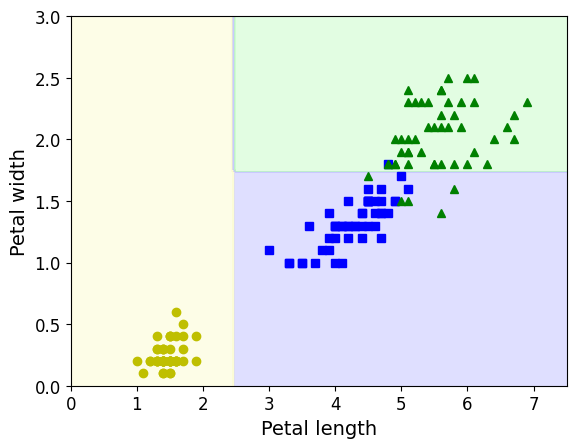

In [39]:
clf_original_data =  DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
clf_original_data.fit(X, y)
plot_decision_boundary(clf_original_data, X, y)
print(clf_original_data.score(X,y))

The following cell rotates the data by angle 20

In [22]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

0.9733333333333334


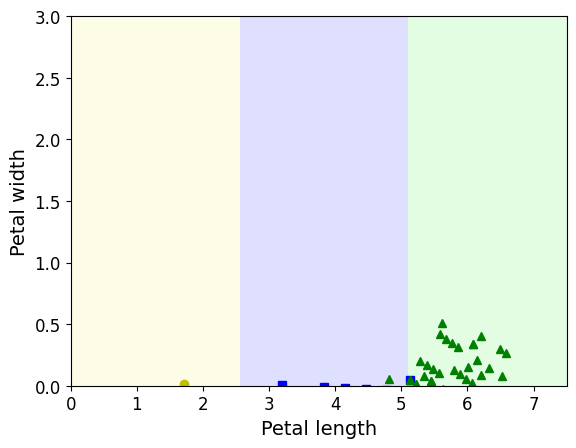

In [35]:
clf_rotated_data =  DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
clf_rotated_data.fit(Xr, y)
plot_decision_boundary(clf_rotated_data, Xr, y)
print(clf_rotated_data.score(Xr, y))

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [25]:
import numpy as np
def plot_logistic_regression(clf, X, y, axes, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

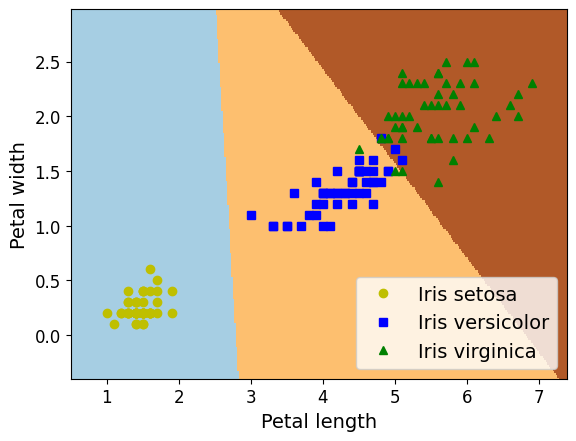

0.9666666666666667


In [36]:
from sklearn.linear_model import LogisticRegression
logreg_classifier =  LogisticRegression().fit(X, y)
plot_logistic_regression(logreg_classifier, X, y, axes=[0, 7.5, 0, 3])
print(logreg_classifier.score(X, y))

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

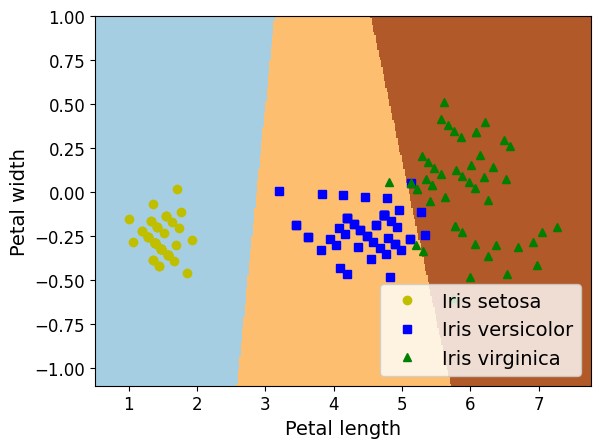

0.9666666666666667


In [37]:
from sklearn.linear_model import LogisticRegression
logreg_classifier_rotated_data =  LogisticRegression().fit(Xr, y)
plot_logistic_regression(logreg_classifier_rotated_data, Xr, y, [0, 7.5, 0, 3])
print(logreg_classifier_rotated_data.score(Xr, y))

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. Decision Tree Classifier is higher when data is rotated and lower when it is linear.

2.When the original iris dataset is rotated, the relationships between the features and the target variable may become more complex or non-linear. In this case, the decision tree may perform better than logistic regression because it is better able to model these more complex relationships. On the other hand, when the original data is used, the relationships between the features and the target variable may be simpler or more linear, in which case logistic regression may perform better than decision trees.

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [57]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

2. Split it into a training set and a test set using train_test_split().

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier. 
    - Choose reasonable values for each hyperparameter.

In [59]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'max_leaf_nodes': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20]
}
# Create a decision tree classifier object
dtc = DecisionTreeClassifier(random_state=42)
# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5)
# Fit the GridSearchCV object to the data
grid_search.fit(X, y)
# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'max_leaf_nodes': 25, 'min_samples_split': 2}


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [60]:
from sklearn.metrics import accuracy_score
train_set_fit = DecisionTreeClassifier(max_depth= 6, max_leaf_nodes = 25, min_samples_split =2).fit(X_train, y_train)

In [61]:
y_pred = train_set_fit.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8560606060606061


## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**
1.Model with depth = 5 is more specific and captures data points better than the model with depth = 2.
2. The model with depth = 5 has higher variance error as it can create more complex decision boundaries that are more sensitive to fluctuations in the training data.
3. The model with depth = 2 will have higher bias error as it will create simpler decision boundaries that may not be able to capture the complexity of the underlying relationships in the data.

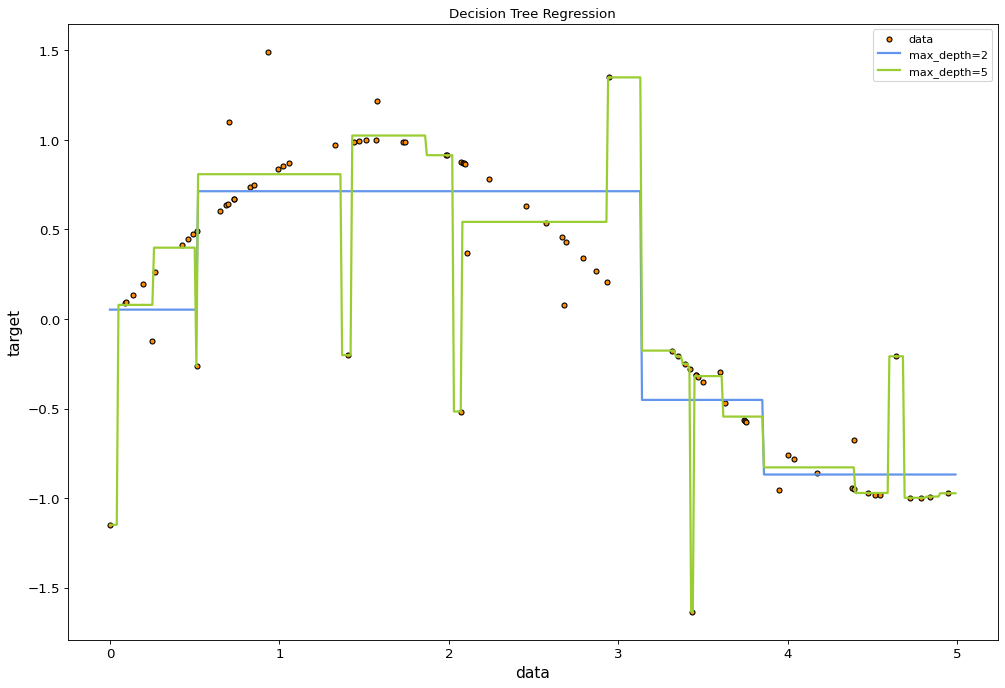

In [50]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [51]:
nx, ny = (3, 2)
x = np.linspace(0, 1, 6)
y = np.linspace(0, 1, 4)
xv, yv = np.meshgrid(x, y)
print(xv)
print(yv)

[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]
[[0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         1.         1.         1.         1.         1.        ]]
